In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_circles
from itertools import product


In [122]:
c_points, c_labels = make_circles(n_samples=250, noise=0.05, factor=0.5, random_state=0)
print(c_labels)

[1 0 0 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1 1 1
 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0
 1 1 1 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1
 1 0 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1
 0 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1]


In [123]:
df = pd.DataFrame(data=c_points, columns=['xa', 'xb']) 
df

,xa,xb
0,0.048383,-0.482417
1,0.967786,-0.170552
2,-0.034804,-1.001310
3,-0.011754,0.528736
4,0.124155,0.519885
...,...,...
245,-0.925891,-0.236255
246,-0.572170,-0.138878
247,0.930268,-0.366462
248,-0.656398,0.754564


<Figure size 1500x500 with 0 Axes>

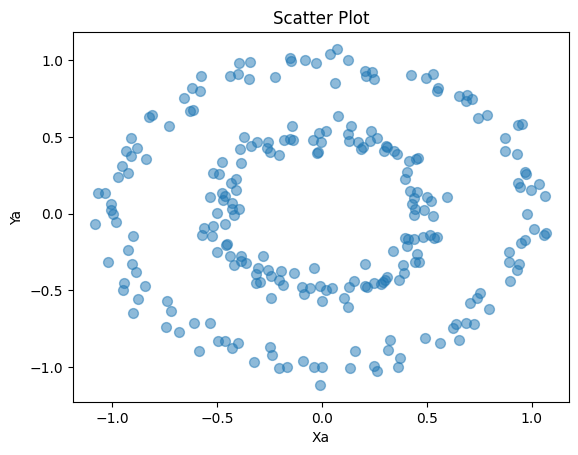

In [124]:
fig = plt.figure(figsize=(15, 5))

df.plot.scatter(x = 'xa', y = 'xb', s = 50,  alpha=0.5); 

plt.xlabel('Xa')
plt.ylabel('Ya')
plt.title('Scatter Plot')
plt.show()       
        

In [166]:
data = df.values
data.shape

(120, 3)

In [126]:
def centered(data):
    centered_data = data - np.mean(data,axis=0) 
    return centered_data

In [127]:
def calculate_cov(data):
    num_samples = data.shape[1] 
    cov = (data @ data.T) / num_samples
    return cov

In [128]:
centered_data = centered(data).T
cov = calculate_cov(centered_data)

In [129]:
cov

array([[0.31517815, 0.00257219],
       [0.00257219, 0.31096575]])

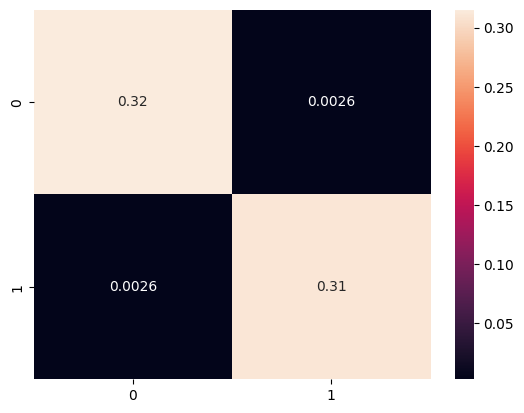

In [130]:
hm = sns.heatmap(data=cov, annot=True) 
plt.show()

In [136]:
def eigen(cov,features_names):
    eigen_values , eigen_vectors = np.linalg.eig(cov)
    # sort the eigenvectors and eigenvalues descending in terms of the eigenvalues
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_features = features_names[sorted_index]
    sorted_eigenvalues = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
    
    return sorted_eigenvalues,sorted_eigenvectors,sorted_features

In [137]:
features_names = np.array(df.columns.to_list())
features_names

array(['xa', 'xb'], dtype='<U2')

In [138]:
eigenvalues, eigenvectors, sorted_features = eigen(cov,features_names)
print(f"Sorted Features: {sorted_features}")
print(f"eigenvalues: {eigenvalues}")
print(f"eigenvectors:\n{eigenvectors}")

Sorted Features: ['xa' 'xb']
eigenvalues: [0.31639644 0.30974746]
eigenvectors:
[[ 0.90375351 -0.42805326]
 [ 0.42805326  0.90375351]]


In [139]:
def pca(data,k,eigenvectors):
    top_eigenvectors = eigenvectors[:,:k]
    F = np.dot(top_eigenvectors.T,data)
    return F, top_eigenvectors

In [140]:
def calculate_error(F,top_eigenvectors,data):
    
    F_inverse = np.dot(top_eigenvectors,F) + np.mean(data,axis=0).reshape(-1,1)
    
    error = np.mean((data.T-F_inverse)**2)
    
    return error,F_inverse.T

In [143]:
for k in range(data.shape[1] ,0,-1):
    data_reduced, top_eigenvectors = pca(centered_data,k,eigenvectors)
    error, inverse = calculate_error(data_reduced,top_eigenvectors,data)
    print(f"{k} number of components Error: {error:0.2f}")

2 number of components Error: 0.00
1 number of components Error: 0.15


In [145]:
k = data.shape[1] 
data_reduced, top_eigenvectors = pca(centered_data,k,eigenvectors)
error, inverse = calculate_error(data_reduced,top_eigenvectors,data)
print(f"{k} number of components Error: {error:0.2f}")

2 number of components Error: 0.00


In [146]:
dataframe = pd.DataFrame.from_records(data_reduced.T)
dataframe

,0,1
0,-0.163332,-0.455990
1,0.801076,-0.567695
2,-0.460626,-0.889333
3,0.215146,0.483585
4,0.334186,0.417409
...,...,...
245,-0.938465,0.183521
246,-0.577106,0.120114
247,0.683309,-0.728689
248,-0.270786,0.963620


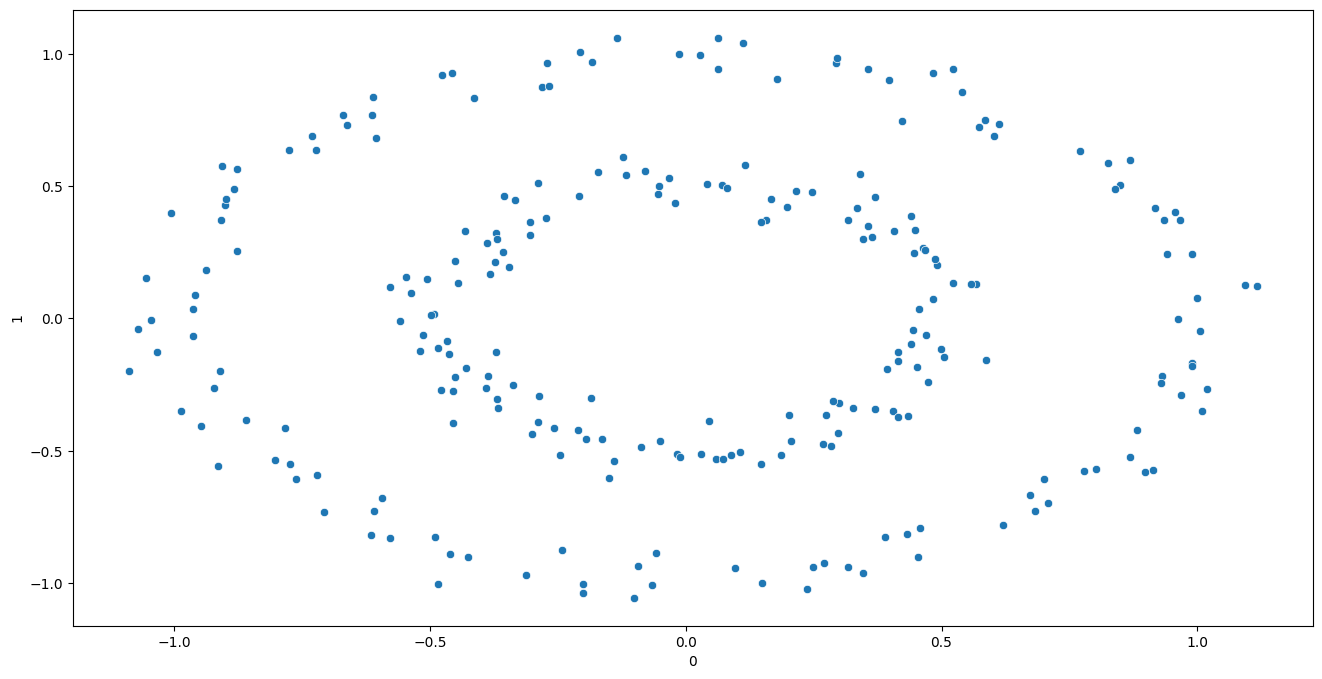

In [147]:
fig, ax = plt.subplots(figsize=(16, 8))

sns.scatterplot(data=dataframe, x=dataframe[0], y=dataframe[1], ax=ax)
plt.show()

In [98]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

In [148]:
def corr_distance(point1, point2):
    pass

In [150]:
def range_query(data, point, epsilon):
    neighbors = []
    for i, data_point in enumerate(data):
        if euclidean_distance(point, data_point) <= epsilon:
            neighbors.append(i)
    return neighbors

In [151]:
def expand_cluster(data, labels, current_point, neighbors, cluster_id, epsilon, min_points):
    labels[current_point] = cluster_id
    queue = neighbors.copy()

    while queue:
        current_neighbor = queue.pop(0)

        if labels[current_neighbor] == -1:
            labels[current_neighbor] = cluster_id
            new_neighbors = range_query(data, data[current_neighbor], epsilon)
            if len(new_neighbors) >= min_points:
                queue.extend(new_neighbors)

        elif labels[current_neighbor] == 0:
            labels[current_neighbor] = cluster_id

In [152]:
def dbscan(data, epsilon, min_points):

    labels = np.full(len(data), -1, dtype=int)

    cluster_id = 0

    for i in range(len(data)):

        if labels[i] != -1:
            continue

        # Find neighbors of the current point
        neighbors = range_query(data, data[i], epsilon)

        # If the number of neighbors is less than min_points, mark the point as noise
        if len(neighbors) < min_points:
            labels[i] = -1  # Noise point
        else:
            # Expand the cluster starting from the current point
            cluster_id += 1
            expand_cluster(data, labels, i, neighbors, cluster_id, epsilon, min_points)

    return labels

In [153]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors = 6)
neighbors_fit = neighbors.fit(data_reduced.T)
distances, indices = neighbors_fit.kneighbors(data_reduced.T)

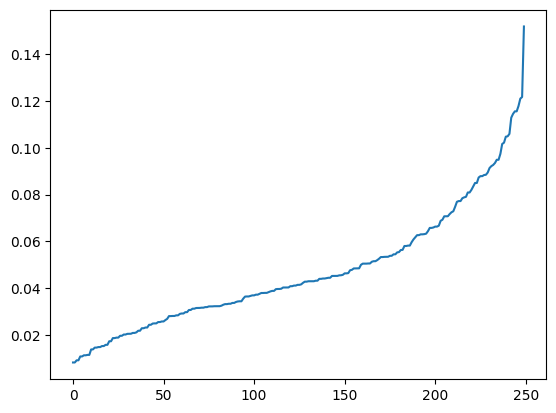

In [154]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [156]:
eps_values = np.arange(0.06,0.3, 0.02)
minPts_values = np.arange(2,12)
len(eps_values), len(minPts_values)

(12, 10)

In [157]:
params = list(product(eps_values, minPts_values))

In [158]:
from sklearn.metrics import silhouette_score

sil_score = []
for p in params:
    cluster_labels = dbscan(data_reduced.T, p[0], p[1])
    if len(set(cluster_labels)) > 1:
        sil_score.append(silhouette_score(data_reduced.T, cluster_labels))
    else:
        sil_score.append(np.nan)

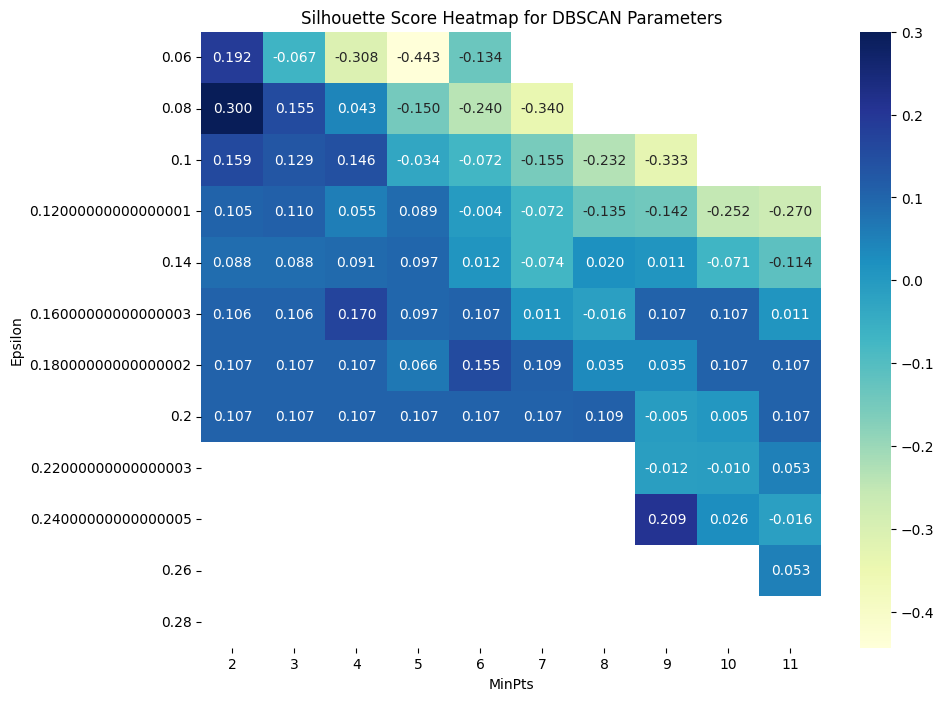

In [159]:
# Create a DataFrame to store the results
df = pd.DataFrame({'Epsilon': [p[0] for p in params],
                   'MinPts': [p[1] for p in params],
                   'Silhouette Score': sil_score})

# Create a pivot table for the heatmap
pivot_df = df.pivot(index='Epsilon', columns='MinPts', values='Silhouette Score')

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title('Silhouette Score Heatmap for DBSCAN Parameters')
plt.show()

In [162]:
cluster_labels = dbscan(data_reduced.T, 0.20,4)
for num in np.unique(cluster_labels): print(f"Cluster {num}: {sum(cluster_labels==num)}")

Cluster 1: 125
Cluster 2: 125


In [161]:
cluster_labels = dbscan(data_reduced.T, 0.3,4)
for num in np.unique(cluster_labels): print(f"Cluster {num}: {sum(cluster_labels==num)}")

Cluster 1: 250


In [163]:
data.shape

(250, 2)

In [164]:
cluster_labels.astype(float)
cluster_labels.shape

(250,)

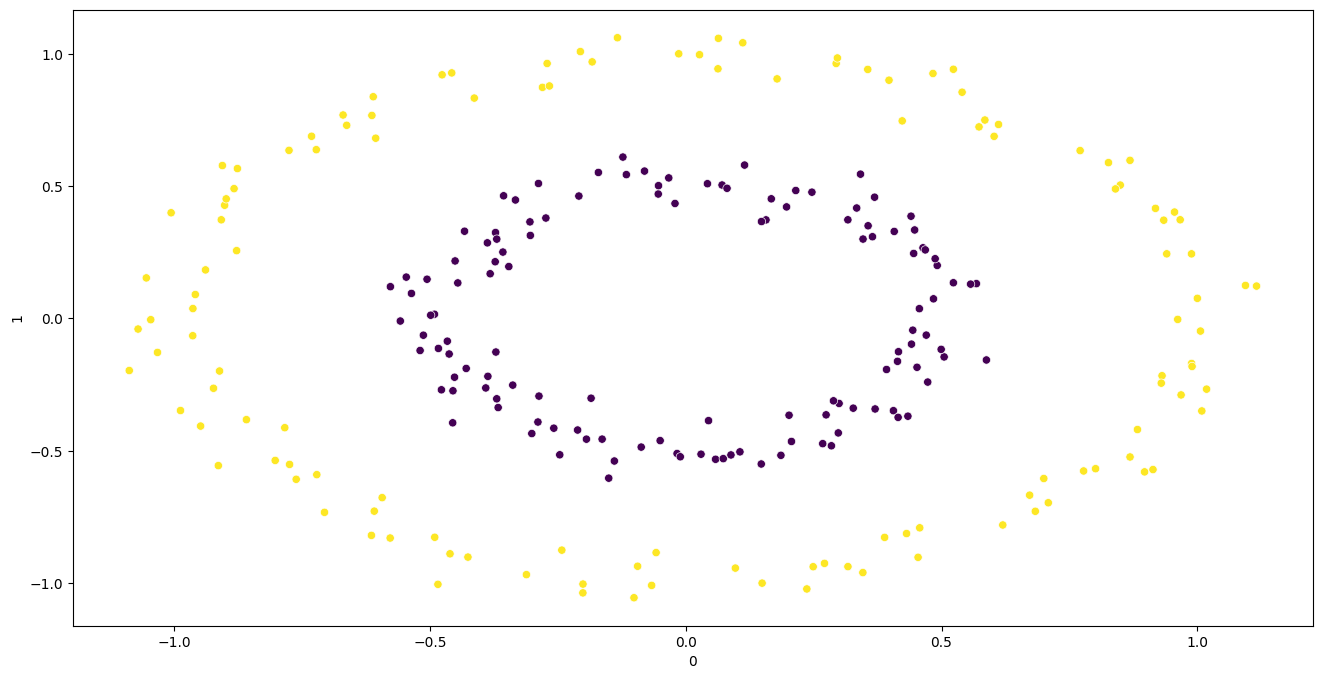

In [165]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.scatterplot(data=dataframe, x=dataframe[0], y=dataframe[1], c=cluster_labels.astype(float), ax=ax)
plt.show()

1